# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow as tf

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [2]:
#Import the dataset and read the image into a seperate variable

images='Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))


The total images present in the dataset: 8091


Image Name : 1000268201_693b08cb0e.jpg


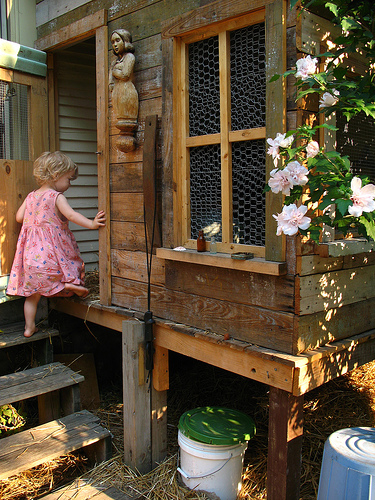

In [3]:
#Visualise both the images & text present in the dataset
from PIL import Image
print("Image Name : "+str(all_imgs[0]).split("/")[1])
Image.open(all_imgs[0])

In [4]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    op_file=open(filename)
    text=op_file.read()
    op_file.close()
    return text
text_file='captions.txt'
doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
    
all_img_id=[] 
all_img_vector=[]
annotations= []

capt_list=doc.split("\n")
capt_list=capt_list[1:-1] # Dropping headding and last line 
for line in capt_list:
    l1=line.split(",")
    if len(l1)>2:
        l1[1]=l1[1]+" "+l1[2] # Some Lines have , in the middle 
    all_img_id.append(l1[0])
    all_img_vector.append(images+"/"+l1[0])
    annotations.append(l1[1])
    

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,Images/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,Images/997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,Images/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,Images/997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [6]:
#Create a list which contains all the captions
annotations=[]
all_img_path= set() # To avoid duplicate values
for line in capt_list:
    l1=line.split(",")
    if len(l1)>2:  # Some Lines have , in the middle 
        l1[1]=l1[1]+" "+l1[2]
    annotations.append("<start> "+l1[1]+" <end>")
    all_img_path.add(images+"/"+l1[0])

all_img_path=list(all_img_path)
#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [7]:
from collections import Counter
#Create the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]

val_count=Counter(vocabulary)
print(len(val_count))
val_count

9131


Counter({'<start>': 40455,
         'a': 61337,
         'child': 1523,
         'in': 18777,
         'pink': 726,
         'dress': 345,
         'is': 9269,
         'climbing': 499,
         'up': 1252,
         'set': 107,
         'of': 6650,
         'stairs': 109,
         'an': 2384,
         'entry': 1,
         'way': 50,
         '.': 34209,
         '<end>': 40455,
         'girl': 3312,
         'going': 148,
         'into': 1070,
         'wooden': 284,
         'building': 498,
         'little': 1752,
         'playhouse': 6,
         'the': 18055,
         'to': 3133,
         'her': 1161,
         'cabin': 4,
         'black': 3789,
         'dog': 8087,
         'and': 8589,
         'spotted': 36,
         'are': 3427,
         'fighting': 130,
         'tri-colored': 14,
         'playing': 1982,
         'with': 7685,
         'each': 419,
         'other': 741,
         'on': 10608,
         'road': 385,
         'white': 3885,
         'brown': 2538,
         

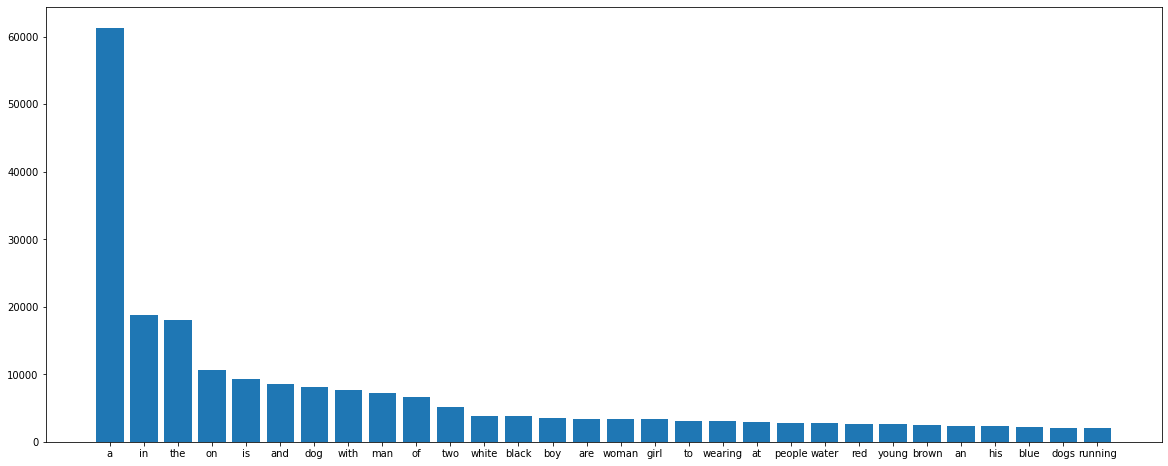

In [8]:
#Visualise the top 30 occuring words in the captions
import matplotlib.pyplot as plt
del_words=["<start>","<end>",".","!"] # Words that we need to ignored for getting word ranks
val_copy= val_count.copy()
for w in del_words:
    del val_copy[w]

vocab=dict(val_copy.most_common(30))

vals=list(vocab.values())
wo=list(vocab.keys())
plt.figure(figsize=(20,8))
plt.bar(range(len(vals)), vals, tick_label=wo)
plt.show()
#write your code here

# Most of the top ranking words are stop words like "a" ,"in", "the" and a few words like "dog" , " man" , "two" , " white" 

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [9]:
# create the tokenizer
from keras.preprocessing.text import Tokenizer
word_count=5000
tokenizer=Tokenizer(num_words=word_count+2,filters='!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',lower=True,char_level=False, oov_token='UNK')

#your code here

In [10]:
# Create word-to-index and index-to-word mappings.
tokenizer.fit_on_texts(annotations)
train_seq=tokenizer.texts_to_sequences(annotations)


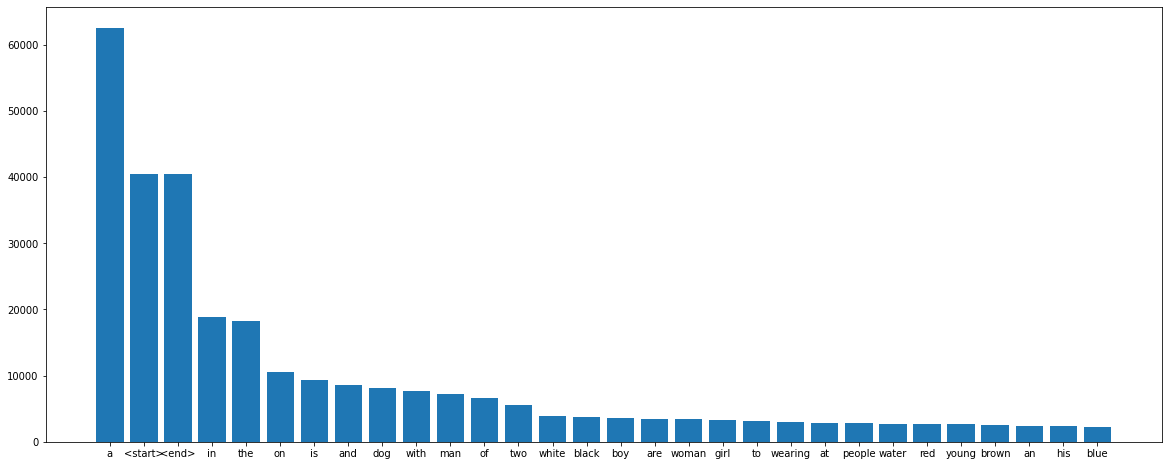

In [11]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
top_num=30
top_words=sorted(tokenizer.word_counts.items(),key=lambda x:x[1],reverse=True)[:top_num]
wo=[]
val=[]
for x in top_words:
    wo.append(x[0])
    val.append(x[1])
plt.figure(figsize=(20,8))
plt.bar(range(len(val)), val, tick_label=wo)
plt.show()
#your code heretr

In [12]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'
# Check the assignement
print(tokenizer.oov_token)
print(tokenizer.index_word[0])
# We need to get the length of the caption with the most words
cap_lenth=[len(x) for x in train_seq]
max_length=max(cap_lenth)
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seq, padding= 'post', maxlen = max_length,dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

UNK
PAD
The shape of Caption vector is :(40455, 39)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [13]:
#write your code here to create the dataset consisting of image paths
all_img_path=all_img_vector
all_img_path

['Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007320043_627395c3d8.jpg',
 'Images/1007320043_627395c3d8.jpg',
 

In [14]:
#write your code here for creating the function. This function should return images & their path

def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    
    return img, image_path

In [15]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

encode_train_set = sorted(set(all_img_vector))

feature_dict = {}

image_data_set = tf.data.Dataset.from_tensor_slices(encode_train_set)
image_data_set = image_data_set.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

image_data_set

2023-05-14 08:01:56.229799: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-14 08:01:56.229871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14802 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1b:00.0, compute capability: 7.5


<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [16]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input =image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

In [17]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
import pickle
import os
if os.path.isfile('feature_dic.pkl'):
    with open('feature_dic.pkl','rb') as fp:
        feature_dict=pickle.load(fp)
else:
    from tqdm import tqdm
    for image,path in tqdm(image_data_set):
        batch_features = image_features_extract_model(image)
        batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))
        for batch_f, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8")
            feature_dict[path_of_feature] =  batch_f.numpy()
    with open ('feature_dic.pkl','wb') as fp:
        pickle.dump(feature_dict,fp)


100%|██████████| 253/253 [00:42<00:00,  5.98it/s]


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [18]:
#write your code here
from sklearn.model_selection import train_test_split
path_train, path_test, cap_train, cap_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [19]:
print("Training data for images: " + str(len(path_train)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for images: " + str(len(path_test)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Training data for Captions: 32364
Testing data for images: 8091
Testing data for Captions: 8091


In [20]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image_name, caption):
    
    # your code goes here to create the dataset & transform it
    
    img_tensor = feature_dict[image_name.decode('utf-8')]
    return img_tensor, caption

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [21]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BATCH_SIZE = 32
BUFFER_SIZE = 1000
def gen_dataset(images_data, captions_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [22]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [23]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 39)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [24]:
embedding_dim = 256 
units = 512
vocab_size = 5002
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE
max_length=39
feature_shape = sample_img_batch.shape[1]
attention_feature_shape = sample_img_batch.shape[0]


### Encoder

In [26]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense =tf.keras.layers.Dense(embed_dim)
        
    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features=tf.keras.activations.relu(features,alpha=0.01,max_value=None,threshold=0)
        
        return features

In [27]:
encoder=Encoder(embedding_dim)

### Attention model

In [28]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  hidden[:,tf.newaxis]# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features#shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [29]:
class Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):

        super(Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = Attention_model(self.units)

    def call(self, x, features, hidden):
    # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
        output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [30]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [31]:
features=encoder(sample_img_batch)

hidden = decoder.reset_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5002)
Attention weights shape from Decoder: (32, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE)#define your loss object

In [33]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [34]:
checkpoint_path = "checkpoint/ch1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [35]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [36]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        encoder_op = encoder(img_tensor)

        #apply teacher forcing by passing target word as next input to the decoder
        for r in range(1, target.shape[1]) :
          #pass encoder_op to decoder
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [37]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.reset_state(batch_size = target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)

      #apply teacher forcing again
      for r in range(1, target.shape[1]) :
        #pass encoder_op to decoder
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)

        dec_input = tf.expand_dims(target[: , r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var
    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))                      


    return loss, avg_loss

In [38]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss = total_loss + t_loss
        avg_test_loss = total_loss/ test_num_steps


    #write your code to get the average loss result on your test data
    
    return avg_test_loss

In [39]:
from tqdm import tqdm
import time
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|▋         | 1/15 [04:18<1:00:19, 258.51s/it]

For epoch: 1, the train loss is 1.163, & test loss is 0.987
Time taken for 1 epoch 258.37589502334595 sec

Test loss has been reduced from 100.000 to 0.987


 13%|█▎        | 2/15 [06:20<38:37, 178.26s/it]  

For epoch: 2, the train loss is 0.918, & test loss is 0.879
Time taken for 1 epoch 121.90333819389343 sec

Test loss has been reduced from 0.987 to 0.879


 20%|██        | 3/15 [08:23<30:33, 152.81s/it]

For epoch: 3, the train loss is 0.837, & test loss is 0.811
Time taken for 1 epoch 122.362459897995 sec

Test loss has been reduced from 0.879 to 0.811


 27%|██▋       | 4/15 [10:25<25:47, 140.69s/it]

For epoch: 4, the train loss is 0.777, & test loss is 0.755
Time taken for 1 epoch 121.92641067504883 sec

Test loss has been reduced from 0.811 to 0.755


 33%|███▎      | 5/15 [12:27<22:20, 134.07s/it]

For epoch: 5, the train loss is 0.725, & test loss is 0.709
Time taken for 1 epoch 122.19608283042908 sec

Test loss has been reduced from 0.755 to 0.709


 40%|████      | 6/15 [14:29<19:29, 129.97s/it]

For epoch: 6, the train loss is 0.679, & test loss is 0.664
Time taken for 1 epoch 121.83462572097778 sec

Test loss has been reduced from 0.709 to 0.664


 47%|████▋     | 7/15 [16:31<16:57, 127.23s/it]

For epoch: 7, the train loss is 0.638, & test loss is 0.622
Time taken for 1 epoch 121.42615008354187 sec

Test loss has been reduced from 0.664 to 0.622


 53%|█████▎    | 8/15 [18:33<14:38, 125.57s/it]

For epoch: 8, the train loss is 0.599, & test loss is 0.586
Time taken for 1 epoch 121.87481832504272 sec

Test loss has been reduced from 0.622 to 0.586


 60%|██████    | 9/15 [20:35<12:28, 124.71s/it]

For epoch: 9, the train loss is 0.564, & test loss is 0.554
Time taken for 1 epoch 122.62832188606262 sec

Test loss has been reduced from 0.586 to 0.554


 67%|██████▋   | 10/15 [22:36<10:17, 123.48s/it]

For epoch: 10, the train loss is 0.532, & test loss is 0.522
Time taken for 1 epoch 120.59411525726318 sec

Test loss has been reduced from 0.554 to 0.522


 73%|███████▎  | 11/15 [24:38<08:12, 123.05s/it]

For epoch: 11, the train loss is 0.504, & test loss is 0.494
Time taken for 1 epoch 121.94392442703247 sec

Test loss has been reduced from 0.522 to 0.494


 80%|████████  | 12/15 [26:39<06:07, 122.48s/it]

For epoch: 12, the train loss is 0.479, & test loss is 0.470
Time taken for 1 epoch 121.01109576225281 sec

Test loss has been reduced from 0.494 to 0.470


 87%|████████▋ | 13/15 [28:38<04:02, 121.36s/it]

For epoch: 13, the train loss is 0.454, & test loss is 0.450
Time taken for 1 epoch 118.62052583694458 sec

Test loss has been reduced from 0.470 to 0.450


 93%|█████████▎| 14/15 [30:40<02:01, 121.44s/it]

For epoch: 14, the train loss is 0.433, & test loss is 0.428
Time taken for 1 epoch 121.49189639091492 sec

Test loss has been reduced from 0.450 to 0.428


100%|██████████| 15/15 [32:42<00:00, 130.84s/it]

For epoch: 15, the train loss is 0.414, & test loss is 0.408
Time taken for 1 epoch 122.01923370361328 sec

Test loss has been reduced from 0.428 to 0.408


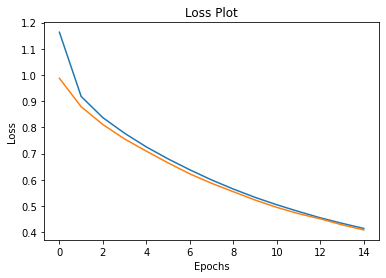

In [40]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [41]:
def evaluate(image):
    attention_plot = np.zeros((max_length,64))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [42]:
def beam_evaluate(image, beam_index = 4):
    start = [tokenizer.word_index['<start>']]
    output = [[start, 0.0]]

    attention_plot = np.zeros((max_length, 64))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(output[0][0]) < max_length:
        i=0
        temp = []
        for s in output:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        output = temp
        output = sorted(output, reverse=False, key=lambda l: l[1])
        output = output[-beam_index:]
        
        
        predicted_id = output[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    output2 = output[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in output2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(output), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [43]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [44]:
from nltk.translate.bleu_score import sentence_bleu

In [45]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.8/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

BELU score: 5.521941719234084e-153
Real Caption: the car leaves a dust trail as it goes around the dirt track
Prediction Caption: a yellow car is driven on a dusty track


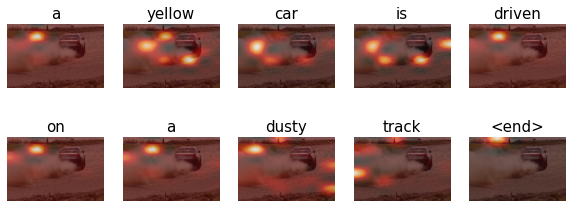

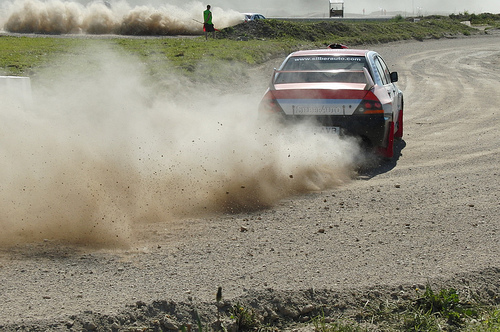

In [46]:
rid = np.random.randint(0, len(path_test))
test_image = path_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.5,0.5,0,0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [47]:
captions=beam_evaluate(test_image)
print(captions)

a yellow car racing while driving down the as a dusty trail


In [50]:
from gtts import gTTS
from playsound import playsound
from IPython import display
def rand_upload(image_name):
    test_image = "Test_uploads/"+image_name

    #real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)


    #real_caption=filt_text(real_caption)      


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    #real_appn = []
    #real_appn.append(real_caption.split())
    #reference = real_appn
    #candidate = pred_caption.split()

    #score = sentence_bleu(reference, candidate, weights=(0.5,0.5,0,0))
    #print(f"BELU score: {score*100}")

    #print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)
    display.display(Image.open(test_image))
    speech = gTTS('Predicted Caption : '+pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    display.display(display.Audio(audio_file, rate = None, autoplay = False))
    

Prediction Caption: a man with a red and white shirt and a sports uniform is jumping up in the back


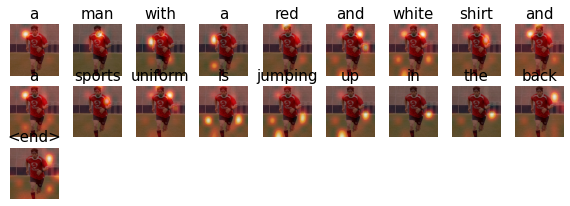

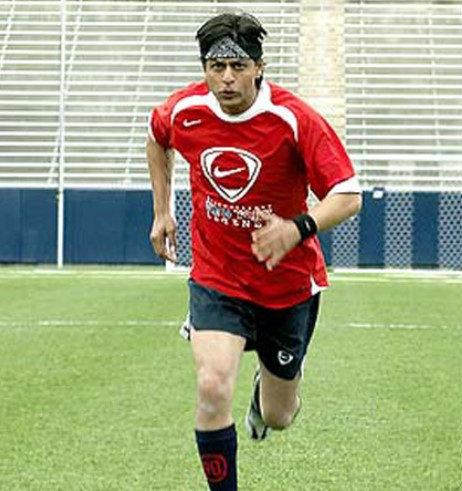

In [54]:
rand_upload("runner.jpg")

Prediction Caption: a man stands on the beach


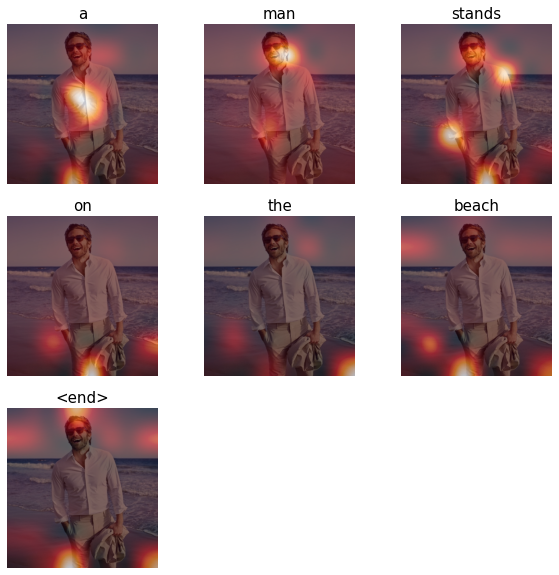

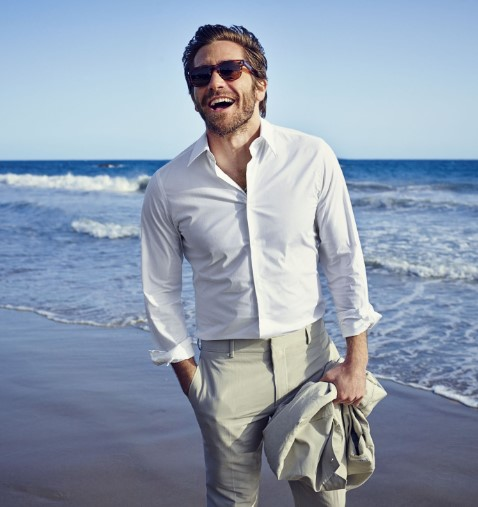

In [57]:
rand_upload("test2.jpg")

Prediction Caption: two kids play in the grass


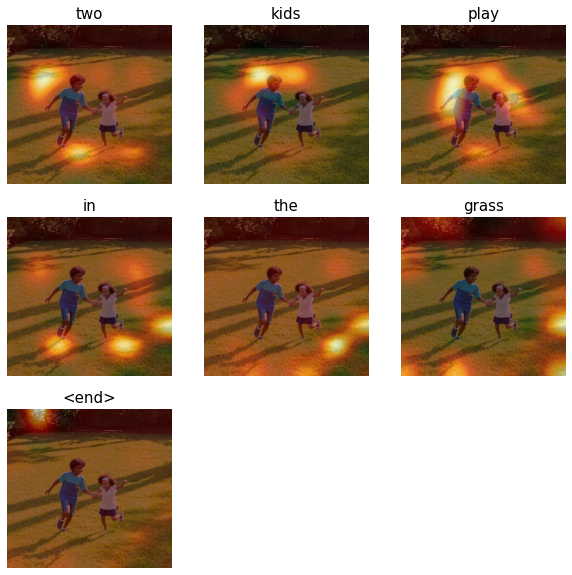

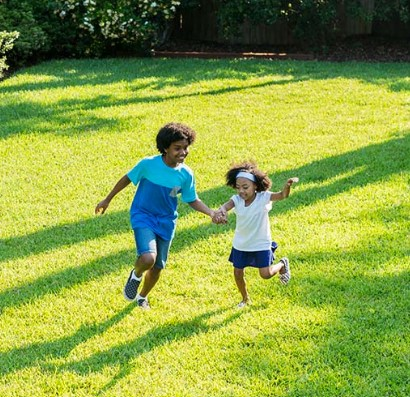

In [59]:
rand_upload("test3.jpg")

# Model seems to be working well even on images that are far from the data set and found online